## IMPORT LIBRARES AND PACKAGES

In [506]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, cv2

from keras.utils import to_categorical

## [1] DATA PREPARATION

Setup data directory

In [507]:
IMAGE_DIRECTORY = "./cohn-kanade-images/"
DATA_LABEL_DIRECTORY = "./data_labels.csv"

#### Load Label Dataset

In [508]:
df = pd.read_csv(DATA_LABEL_DIRECTORY)

Explore head

In [509]:
df.head(5)

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
0,S005,1,11,./cohn-kanade-images/S005/001/S005_001_0000001...,S005_001_00000011,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
1,S010,1,14,./cohn-kanade-images/S010/001/S010_001_0000001...,S010_001_00000014,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
2,S010,2,14,./cohn-kanade-images/S010/002/S010_002_0000001...,S010_002_00000014,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,surprise
3,S010,3,18,./cohn-kanade-images/S010/003/S010_003_0000001...,S010_003_00000018,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,negative
4,S010,4,19,./cohn-kanade-images/S010/004/S010_004_0000001...,S010_004_00000019,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,negative


Explore Tail

In [510]:
df.tail(5)

,subject,sequence,image_index,filepath,file_prefix,AU17,AU1,AU2,AU25,AU27,...,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26,high_level_emotion
555,S506,4,38,./cohn-kanade-images/S506/004/S506_004_0000003...,S506_004_00000038,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,negative
556,S506,6,42,./cohn-kanade-images/S506/006/S506_006_0000004...,S506_006_00000042,1,1,1,0,0,...,0,0,0,0,0,1,0,0,1,negative
557,S895,2,7,./cohn-kanade-images/S895/002/S895_002_0000000...,S895_002_00000007,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative
558,S999,1,18,./cohn-kanade-images/S999/001/S999_001_0000001...,S999_001_00000018,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,negative
559,S999,3,55,./cohn-kanade-images/S999/003/S999_003_0000005...,S999_003_00000055,0,1,1,1,0,...,0,0,0,0,0,0,1,0,0,negative


#### 1.1 DATA INTEGRITY CHECKING

Check Duplicate

In [511]:
print('Number of duplicated rows:', df.duplicated().sum())

Number of duplicated rows: 0


Check Nan Value

In [512]:
print('Number of Nan value rows:\n', df.isnull().sum())

Number of Nan value rows:
 subject               0
sequence              0
image_index           0
filepath              0
file_prefix           0
AU17                  0
AU1                   0
AU2                   0
AU25                  0
AU27                  0
AU4                   0
AU7                   0
AU23                  0
AU24                  0
AU6                   0
AU12                  0
AU15                  0
AU14                  0
AU11                  0
AU26                  0
high_level_emotion    0
dtype: int64


Check Data Overall 

In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject             560 non-null    object
 1   sequence            560 non-null    int64 
 2   image_index         560 non-null    int64 
 3   filepath            560 non-null    object
 4   file_prefix         560 non-null    object
 5   AU17                560 non-null    int64 
 6   AU1                 560 non-null    int64 
 7   AU2                 560 non-null    int64 
 8   AU25                560 non-null    int64 
 9   AU27                560 non-null    int64 
 10  AU4                 560 non-null    int64 
 11  AU7                 560 non-null    int64 
 12  AU23                560 non-null    int64 
 13  AU24                560 non-null    int64 
 14  AU6                 560 non-null    int64 
 15  AU12                560 non-null    int64 
 16  AU15                560 no

## [2] EXPLORATORY DATA ANALYSIS

2.1 Check Label Count

/var/folders/fw/d2x7nnxd3f90qrnsdxzvsjqw0000gn/T/ipykernel_37991/2055809110.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_value_counts.index, y=target_value_counts.values, palette='hls',)


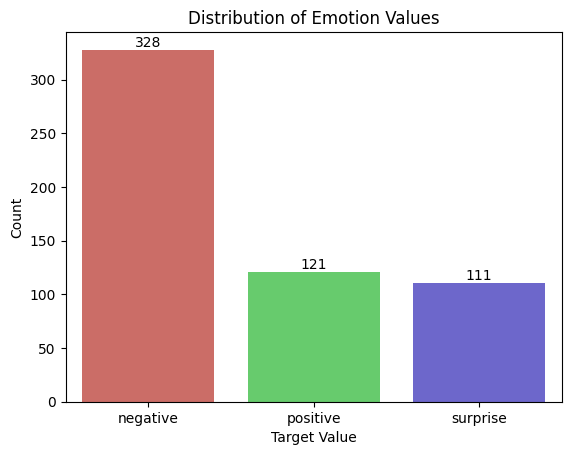

In [514]:
# Get the counts of each target value
target_value_counts = df['high_level_emotion'].value_counts()

# Create a bar plot
ax = sns.barplot(x=target_value_counts.index, y=target_value_counts.values, palette='hls',)

# Show the number of observations inside each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.xlabel('Target Value')
plt.ylabel('Count')
plt.title('Distribution of Emotion Values')
plt.show()

**Observation**

It seems there are unbalanced count of negative comparing to other label

## [3] SETUP AND EXTRACT ESSENTIAL DATA 

#### 3.1 Load and Prepare Image Dataset

In [515]:
# Initialize an empty list to store processed images
img_data_list = []

# Get a list of image file paths from the 'filepath' column in the DataFrame
img_file_list = df['filepath'].tolist()

# Iterate through each image file path
for img in img_file_list:
    input_img = cv2.imread(img)

    ### GrayScale ?
    grayscaled_image = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)

    # Resize the image to a fixed size of 48x48 pixels
    input_img_resize=cv2.resize(grayscaled_image,(48,48))

    # Normalize the image pixel values to lie between 0 and 1
    normalized_image = input_img_resize / 255.0

    ### Expanded ? 
    expanded_image = np.expand_dims(normalized_image, axis=-1)

    img_data_list.append(expanded_image)

# Convert the list of resized images to a NumPy array
img_data = np.array(img_data_list)
# Convert the data type of pixel values to 'float32'
img_data = img_data.astype('float32')

# Check Shape
# 560 images.
# 48 pixels in height.
# 48 pixels in width.
# 1 since the image are grayscaled.
img_data.shape

(560, 48, 48, 1)

#### 3.2 Load and Prepare Label

In [516]:
# Define mapping conversion
target_mapping = {'negative': 0, 'positive': 1, 'surprise': 2}
df['high_level_emotion_num'] = df['high_level_emotion'].map(target_mapping)
labels = df['high_level_emotion_num'].to_list()
num_classes = 3
emotions_label = to_categorical(labels, num_classes=num_classes)

#### 3.3 Load and Prepare FACS CODE

In [517]:
facs_code_list = []
facs_code_df = df[df.columns[5:20]]
for i in range(df.shape[0]):
    facs_code_row = df.iloc[i, 5:20].tolist()
    facs_code_list.append(facs_code_row)
facs_list = np.array(facs_code_list)
facs_code_df

,AU17,AU1,AU2,AU25,AU27,AU4,AU7,AU23,AU24,AU6,AU12,AU15,AU14,AU11,AU26
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0
556,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1
557,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
558,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0


## [4] TRAIN TEST SPLIT

In [518]:
from sklearn.model_selection import train_test_split

MIGHT RESAMPLE

SPLIT TRAIN, VAL, TEST SET

In [519]:
# Split data into training, validation, and test sets
X_train, X_temp, y_train_facs, y_temp_facs, y_train_emotion, y_temp_emotion = train_test_split(img_data, facs_list, emotions_label, test_size=0.3)
X_val, X_test, y_val_facs, y_test_facs, y_val_emotion, y_test_emotion = train_test_split(X_temp, y_temp_facs, y_temp_emotion, test_size=0.5)

# TRAIN (70)
print("Train")
print(len(X_train), len(y_train_facs), len(y_train_emotion), "\n")

# VAl (15)
print("Val")
print(len(X_val),  len(y_val_facs), len(y_val_emotion), "\n")

# TEST (15)
print("Test")
print(len(X_test), len(y_test_facs), len(y_test_emotion))

Train
392 392 392 

Val
84 84 84 

Test
84 84 84


## [5] GET BASELINE MODEL

In [520]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam 

In [521]:
IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_CHANNELS = 1
IMG_SIZE_2D = (IMG_WIDTH, IMG_HEIGHT)
IMG_SIZE_3D = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

5.1 Design Model Structure

In [522]:
input_layer = Input(shape=IMG_SIZE_3D) # INPUT WILL BE IMAGE WITH DESIGNED DIMENSIONS


x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

#  This layer will convert the matrix to 1D Vector
x = Flatten()(x)

# FACS codes output
facs_output = Dense(15, activation='sigmoid', name='facs_output')(x) # 15 FACS codes

# Emotion label output
emotion_output = Dense(3, activation='softmax', name='emotion_output')(x) # 3 emotion labels

# Create the model
model = Model(inputs=input_layer, outputs=[facs_output, emotion_output])

model.compile(optimizer='adam', 
              loss={'facs_output': 'binary_crossentropy', 'emotion_output': 'categorical_crossentropy'}, 
              metrics=['accuracy'])

In [523]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_19 (InputLayer)       [(None, 48, 48, 1)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 46, 46, 32)           320       ['input_19[0][0]']            
                                                                                                  
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 32)           0         ['conv2d_11[0][0]']           
 g2D)                                                                                             
                                                                                                  
 flatten_9 (Flatten)         (None, 16928)                0         ['max_pooling2d_9[0][0]'

In [524]:
history = model.fit(X_train, {'facs_output': y_train_facs, 'emotion_output': y_train_emotion}, 
                    validation_data=(X_val, {'facs_output': y_val_facs, 'emotion_output': y_val_emotion}), 
                    epochs=300, batch_size=32)

Epoch 1/300


2023-11-14 21:12:11.574642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - ETA: 0s - loss: 1.5235 - facs_output_loss: 0.5205 - emotion_output_loss: 1.0031 - facs_output_accuracy: 0.2628 - emotion_output_accuracy: 0.5332

2023-11-14 21:12:16.898420: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


13/13 [==============================] - 8s 402ms/step - loss: 1.5235 - facs_output_loss: 0.5205 - emotion_output_loss: 1.0031 - facs_output_accuracy: 0.2628 - emotion_output_accuracy: 0.5332 - val_loss: 1.5840 - val_facs_output_loss: 0.4891 - val_emotion_output_loss: 1.0949 - val_facs_output_accuracy: 0.2738 - val_emotion_output_accuracy: 0.5000
Epoch 2/300
13/13 [==============================] - 1s 77ms/step - loss: 1.4392 - facs_output_loss: 0.4775 - emotion_output_loss: 0.9617 - facs_output_accuracy: 0.2832 - emotion_output_accuracy: 0.5944 - val_loss: 1.5170 - val_facs_output_loss: 0.4768 - val_emotion_output_loss: 1.0402 - val_facs_output_accuracy: 0.2738 - val_emotion_output_accuracy: 0.5000
Epoch 3/300
13/13 [==============================] - 1s 78ms/step - loss: 1.3911 - facs_output_loss: 0.4643 - emotion_output_loss: 0.9268 - facs_output_accuracy: 0.2857 - emotion_output_accuracy: 0.5944 - val_loss: 1.5090 - val_facs_output_loss: 0.4723 - val_emotion_output_loss: 1.0367 - va

In [525]:
# Evaluate the model on the test set
evaluation = model.evaluate(X_test, {'facs_output': y_test_facs, 'emotion_output': y_test_emotion})

# Unpacking the evaluation results
total_loss = evaluation[0] # Total loss
loss_facs = evaluation[1] # Loss for FACS output
loss_emotion = evaluation[2] # Loss for emotion output
accuracy_facs = evaluation[3] # Accuracy for FACS output
accuracy_emotion = evaluation[4] # Accuracy for emotion output

3/3 [==============================] - 0s 61ms/step - loss: 2.5129 - facs_output_loss: 0.8981 - emotion_output_loss: 1.6147 - facs_output_accuracy: 0.3929 - emotion_output_accuracy: 0.7262


In [526]:
predictions = model.predict(X_test)

1/3 [=========>....................] - ETA: 0s

2023-11-14 21:16:49.788112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 0s 86ms/step


In [527]:
facs_predictions, emotion_predictions = predictions
# Processing FACS predictions: Convert probabilities to binary values
facs_pred_binary = (facs_predictions > 0.5).astype(int)

# Processing Emotion predictions: Convert probabilities to class labels
emotion_pred_labels = np.argmax(emotion_predictions, axis=1)

In [528]:
facs_pred_binary

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [529]:
emotion_pred_labels

array([0, 0, 2, 0, 0, 2, 1, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2,
       0, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0])

## [6] HYPER TUNING

In [530]:
names = ['negative','positive','surprise']

def getLabel(id):
    return ['negative','positive','surprise'][id]